In [2]:
import numpy as np
import skimage as ski
from DAB_Analysis_Functions import DAB
import matplotlib.pyplot as plt
DAB_A = DAB()

In [3]:
img = ski.io.imread('Example_Image_2.tif')


In [14]:
lab_Image = ski.color.rgb2lab(DAB_A.im2double(img))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


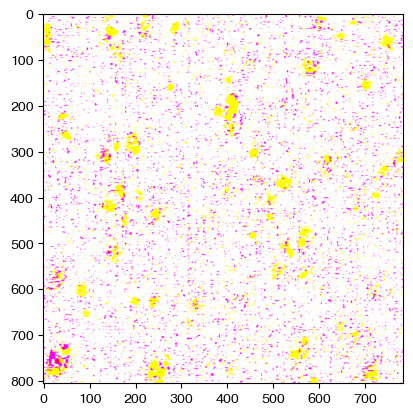

In [15]:
plt.imshow(lab_Image)

In [16]:
default_asyn_params = np.array([38.35, 27.75, 24.9, 15])
default_cell_params = np.array([75.4, 5.5, -3.4, 6])

image_mask_asyn, asyn_params = DAB_A.colourFilterLab(lab_Image, default_asyn_params)
image_mask_nuclei, asyn_params = DAB_A.colourFilterLab(lab_Image, default_cell_params, rate=[1,2])


In [18]:
ski.morphology.disk(1)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

In [19]:
test = 1*ski.morphology.binary_closing(image_mask_asyn, ski.morphology.disk(1))


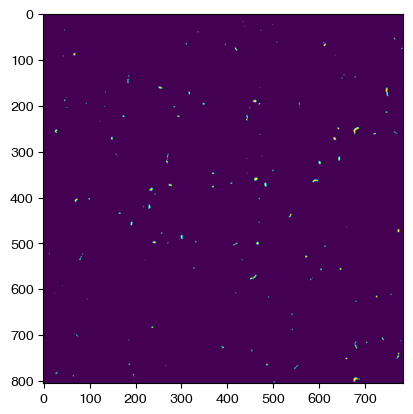

In [20]:
plt.imshow(test)

In [13]:
from skimage.morphology import reconstruction


seed = np.copy(test)
seed[1:-1, 1:-1] = test.max()
mask = test

filled = reconstruction(seed, mask, method='erosion')

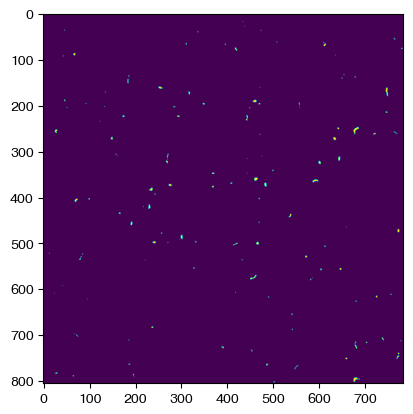

In [14]:
plt.imshow(filled)

In [15]:
from skimage.segmentation import clear_border

In [16]:
segmentation = clear_border(filled)

In [17]:
from scipy import ndimage as ndi

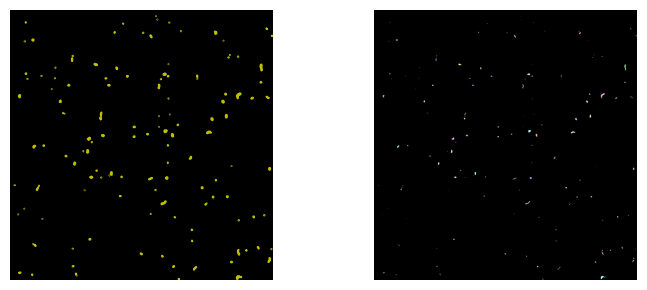

In [18]:
from skimage.color import label2rgb

labeled_coins, _ = ndi.label(segmentation)
image_label_overlay = label2rgb(labeled_coins, image=segmentation, bg_label=0)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(segmentation, cmap=plt.cm.gray)
axes[0].contour(segmentation, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay)

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2hed, hed2rgb

# Example IHC image
ihc_rgb = RGBimage

# Separate the stains from the IHC image
ihc_hed = rgb2hed(ihc_rgb)

# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

# Display
fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_h)
ax[1].set_title("Nuclei")

ax[2].imshow(ihc_e)
ax[2].set_title("Eosin")  # Note that there is no Eosin stain in this image

ax[3].imshow(ihc_d)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()